In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
airlines =pd.read_excel("C:\\Users\\siddh\\Downloads\\Airlines+Data.xlsx")
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
airlines[airlines.duplicated()]

,Month,Passengers


In [7]:
# There are No Duplicate values in the dataset

# DATA VISUALIZATION using various plots

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

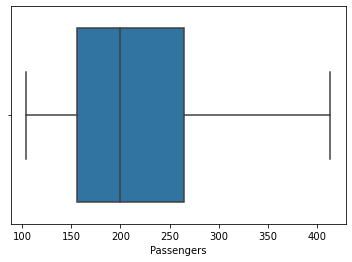

In [8]:
sns.boxplot(airlines['Passengers'])

<AxesSubplot:>

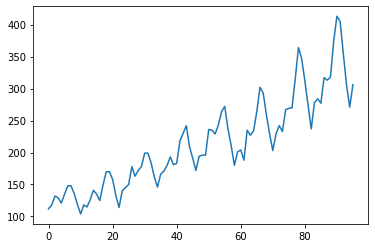

In [9]:
airlines.Passengers.plot()

C:\Users\siddh\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\siddh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


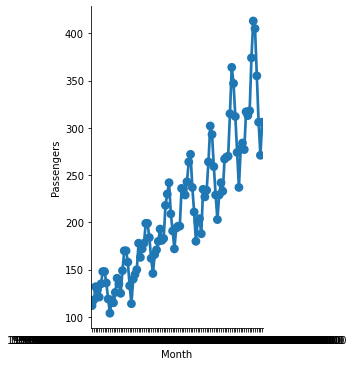

In [10]:
sns.factorplot("Month","Passengers",data=airlines)

# DATA DRIVEN MODELS

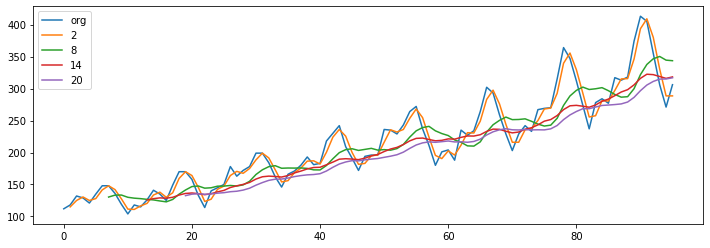

In [11]:
# Moving Average
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# TIME SERIES DECOMPOSITION PLOT

<ipython-input-12-a6d9c11bc547>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")


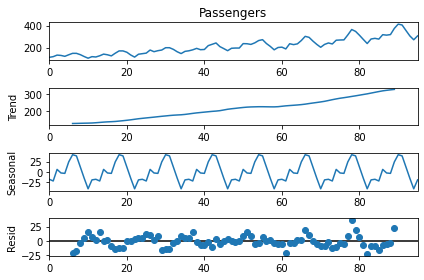

In [12]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()

<ipython-input-13-a95db137d5e8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")


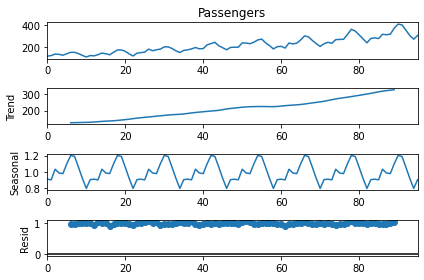

In [13]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

# ACF and PACF PLOTS

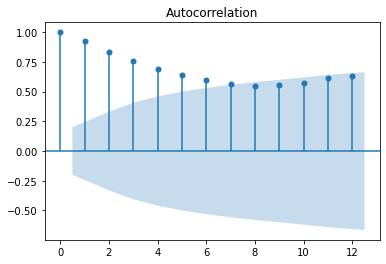

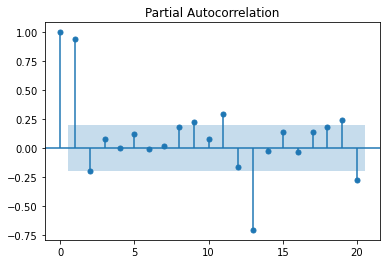

In [14]:
# Auto-Correlation Function and Partial Auto-Correlation Function
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers)
plt.show()

# Train and Test Split

In [15]:
train = airlines.head(70)
test = airlines.tail(26)

# Mean Absolute Percentage Error {MAPE}

In [16]:
# Evaluating Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# SIMPLE EXPONENTIAL SMOOTHING

In [17]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers)

C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


22.076256764951356

# HOLT WINTER's MODEL

In [18]:
hw_model = Holt(train["Passengers"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

15.41799357622358

# HOLT WINTER's Exponential Smoothing with Additive Seasonality and Additive Trend

In [50]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)

C:\Users\siddh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


10.80194843580534

# HOLT WINTER's Exponential Smoothing with Multiplicative Seasonality and Additive Trend

In [20]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

9.102898246943349

In [21]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model

In [22]:
hwe_model_add_add.forecast(10)

96     319.235284
97     311.528413
98     350.278738
99     346.985064
100    351.845130
101    403.925766
102    440.566807
103    427.446405
104    376.628081
105    329.767444
dtype: float64

In [23]:
hwe_model_add_add.params

{'smoothing_level': 0.25465096677759974,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.7453490332224002,
 'damping_trend': nan,
 'initial_level': 175.8862045205537,
 'initial_trend': 2.3328384315692254,
 'initial_seasons': array([-66.22063198, -60.62097066, -48.14661065, -53.41986225,
        -62.18508297, -48.08588492, -35.87370184, -38.30087523,
        -52.43139355, -71.23316601, -85.67073639, -69.06058726]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

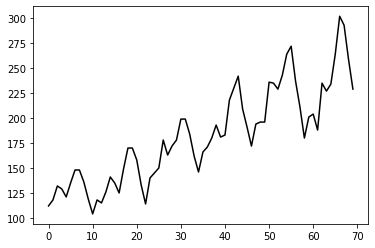

In [24]:
plt.plot(train.index, train["Passengers"], label='Train',color="black")

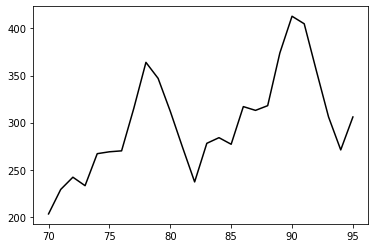

In [25]:
plt.plot(test.index, test["Passengers"], label='Test',color="black")

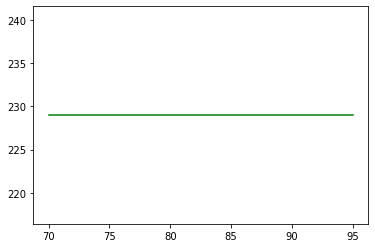

In [26]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

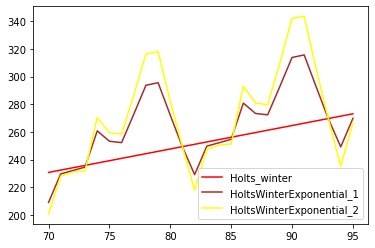

In [27]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

In [28]:
# Model Based Methods
airlines["Date"] = pd.to_datetime(airlines["Month"],format="%b-%y")
#look for c standard format codes
airlines

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


In [30]:
# Extraction of Month and Year
airlines["month"] = airlines.Date.dt.strftime("%b")
airlines["year"] = airlines.Date.dt.strftime("%Y") 
airlines

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [37]:
t= np.arange(1,97)
airlines['t']=t
airlines['t_square']=airlines['t']*airlines['t']

In [38]:
log_Passengers=np.log(airlines['Passengers'])
airlines['log_Passengers']=log_Passengers

In [ ]:
airlines = pd.get_dummies(airlines,columns=['month'])
airlines.head(15)

In [39]:
# Train and Test Split
train = airlines.head(70)
test = airlines.tail(26)

# Linear Model

In [51]:
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

17.681879908211886

# Qudratic Model

In [41]:
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

43.89814496742656

# Exponential Model

In [42]:
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

43.47847070446902

# Additive Seasonality

In [43]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predadd = pd.Series(additive.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

124.97569951828827

# Additive Seasonality with Linear Trend

In [44]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.502089794271306

# Additive Seasonality with Quadratic Trend

In [45]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddquad = pd.Series(addquad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895926563

# Multiplicative Seasonality

In [46]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmul = pd.Series(mulsea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

# Multiplicative Seasonality with Linear Trend

In [47]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmullin = pd.Series(mullin.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmullin))**2))
rmsemul

298.6798189957354

# Multiplicative Seasonality with Quadratic Trend

In [48]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895926563

# Comparing all the RMSE Values

In [52]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Values'])

,Model,Values
5,rmselin,17.681880
0,rmse_mul_quad,30.393043
3,rmseaddquad,30.393043
2,rmseaddlinear,34.502090
4,rmseexpo,43.478471
8,rmsequad,43.898145
1,rmseadd,124.975700
7,rmsemulin,298.136614
6,rmsemul,298.679819


In [ ]:
# By observing the above output we conclude that Linear Model has less RMSE Value.
# Thus Linear Model Suits Best for our Data Set